<a href="https://colab.research.google.com/github/zoetice/data-science/blob/main/Copy_of_Unit6ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 6 Exercises: Is my model good?

#### Over and Under fitting, Model Visualization, and Model/Variable Selection Concepts

These exercises are meant to get you to think about the model and variable selection process, and consider how we determine if a model is "good".

**Task1**:

Does elpd_loo mean anything if we only have one model?

it is mostly used to compare models to eachother, so it is mostly useless for one model

**Task2**:

Describe overfitting, in the context of this course

"Overfitting is when our model seems to predict the data we have on hand well--but those predictions don't generalize to new, similar data. In other words, our model over fits the curve of the data, and doesn't allow enough room to adapt to the inherent variation in reality." - Unit 6 notes

**Task3**:

How do we mitigate overfitting?

 weakly informative, or regularizing, priors

**Task4**:

How do we mitigate underfitting?

make sure model is complex enough to make better predictions

**Task5**:

Why would we want more than one predictor in a model?

multiple predictors could make data more accurate as in real life the model may be affected by multiple other things

**Task6**:

Can we have too many predictors? How would we know?

If there are too many predictors there may be overfitting

**Task7**:

What is variable selection, and how does it work?

Variable selection is the process of answering the questions:

do we really need multiple predictors?

if so, how many do we need?

and which ones?

aka you are selecting the variables

**Task8**:

Describe the differences and similarities between the following three models: linear regression with two predictors, one of which is a categorical variable:

- adding the variables in the model, as is standard.
- using that categorical variable as a hierarchy upon the other predictor variable.
- adding the variables, plus the categorical variable's interaction with the other variable.

they all aim to predict a continuous output variable, but model 1 is an additive affects model, model 2 is seperate regression models, and model 3 is an interaction effects model

**Task9**:

How do we visualize multiple linear regression models? Can we visualize the entire model, all at once?

you visualize multiple linear regression models with regularings priors and bambi. You can't visualize it all at once, but you can have a bunch of different 2D graphs


**Task10**:

Compare the following linear models that all use the basketball data to predict field goal percentage:

- predictors free throw percentage and position (with position as a categorical predictor)
- predictors free throw percentage and position (with position as a hierarchy)
- predictors free throw percentage and position (with position interacting with frew throw percentage)
- predictors free throw percentage, position, 3 point attempts, and interactions between all three predictors
- predictors free throw percentage, position, 3 point attempts, with an interaction between 3 point attempts and postion.

using ```az.compare()``` and ```az.plot_compare()```, or an equivalent method using LOO (elpd_loo).

You may use the following two code blocks to load and clean the data.

In [ ]:
import numpy as np
import pandas as pd
import arviz as az
import pymc as pm
import graphviz as gv
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install bambi

In [ ]:
import bambi as bmb

In [ ]:
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt

In [ ]:
#have to drop incomplete rows, so that bambi will run
bb = pd.read_csv(
    'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/basketball2324.csv'
    ).dropna()

In [ ]:
bb

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FGp,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
1,Bam Adebayo,C,26,MIA,71,71,2416,530,1017,0.521,...,159,578,737,278,81,66,162,159,1367,adebaba01
2,Ochai Agbaji,SG,23,TOT,78,28,1641,178,433,0.411,...,74,142,216,83,47,44,64,117,455,agbajoc01
3,Santi Aldama,PF,23,MEM,61,35,1618,247,568,0.435,...,72,280,352,138,43,54,69,89,654,aldamsa01
4,Nickeil Alexander-Walker,SG,25,MIN,82,20,1921,236,538,0.439,...,35,132,167,204,64,42,76,143,655,alexani01
5,Grayson Allen,SG,28,PHO,75,74,2513,340,682,0.499,...,48,247,295,227,69,45,95,157,1014,allengr01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,Jalen Wilson,PF,23,BRK,43,3,664,76,179,0.425,...,47,84,131,45,11,4,19,48,214,wilsoja03
563,James Wiseman,C,22,DET,63,6,1091,187,305,0.613,...,110,226,336,54,12,39,66,141,446,wisemja01
565,Christian Wood,PF,28,LAL,50,1,872,123,264,0.466,...,39,215,254,49,16,33,50,72,347,woodch01
566,Delon Wright,PG,31,TOT,47,1,742,74,188,0.394,...,19,67,86,119,54,11,14,32,210,wrighde01


In [ ]:
#only look at players who played more than 600 minutes
#which is 20 min per game, for 30 games
bb = bb.query('MP > 600')
#remove players who never missed a free throw
bb = bb.query('`FT%` != 1.0')
#filter out the combo positions. This will make it easier to read the graphs
bb = bb.query("Pos in ['C','PF','SF','SG','PG']")
#gets rid of the annoying '%' sign
bb.rename(columns={"FT%":"FTp","FG%":"FGp"}, inplace=True)

In [ ]:
model_1 = bmb.Model("FGp ~ FTp + Pos", bb)
idata_1 = model_1.fit(idata_kwargs={"log_likelihood":True})

In [ ]:
model_2 = bmb.Model("FGp ~ FTp + (1|Pos)", bb)
idata_2 = model_2.fit(idata_kwargs={"log_likelihood":True})

In [ ]:
model_2 = bmb.Model("FGp ~ FTp + (1|Pos)", bb)
idata_2 = model_2.fit(idata_kwargs={"log_likelihood":True}, tune=2000, draws=2000, target_accept=0.9)

In [ ]:
model_2 = bmb.Model("FGp ~ FTp + (1|Pos)", bb)
idata_2 = model_2.fit(idata_kwargs={"log_likelihood":True}, tune=2000, draws=2000, target_accept=0.99)

In [ ]:
model_3 = bmb.Model("FGp ~ FTp * Pos", bb)
idata_3 = model_3.fit(idata_kwargs={"log_likelihood":True}, tune=2000, draws=2000, target_accept=0.99)

In [ ]:
model_4 = bmb.Model("FGp ~ FTp * Pos * `3PA`", bb)
idata_4 = model_4.fit(idata_kwargs={"log_likelihood":True}, tune=2000, draws=2000, target_accept=0.99)

In [ ]:
model_5 = bmb.Model("FGp ~ FTp + Pos + `3PA` + `3PA`:Pos", bb)
idata_5 = model_5.fit(idata_kwargs={"log_likelihood":True}, tune=2000, draws=2000, target_accept=0.99)

/usr/local/lib/python3.12/dist-packages/arviz/stats/stats.py:797: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


                                    rank    elpd_loo      p_loo  elpd_diff  \
Model 5: FTp + Pos + 3PA + 3PA:Pos     0  529.989942  12.553667   0.000000   
Model 4: FTp * Pos * 3PA               1  529.865825  21.966996   0.124117   
Model 3: FTp * Pos                     2  509.254323  13.912685  20.735619   
Model 1: FTp + Pos                     3  507.428219   8.236092  22.561723   
Model 2: FTp + (1|Pos)                 4  507.304392   8.335215  22.685551   

                                          weight         se       dse  \
Model 5: FTp + Pos + 3PA + 3PA:Pos  5.945076e-01  15.787127  0.000000   
Model 4: FTp * Pos * 3PA            4.054924e-01  14.391628  5.959596   
Model 3: FTp * Pos                  0.000000e+00  16.720979  7.632220   
Model 1: FTp + Pos                  0.000000e+00  16.095797  6.800997   
Model 2: FTp + (1|Pos)              4.662937e-15  16.101341  6.847988   

                                    warning scale  
Model 5: FTp + Pos + 3PA + 3PA:Pos    Fa

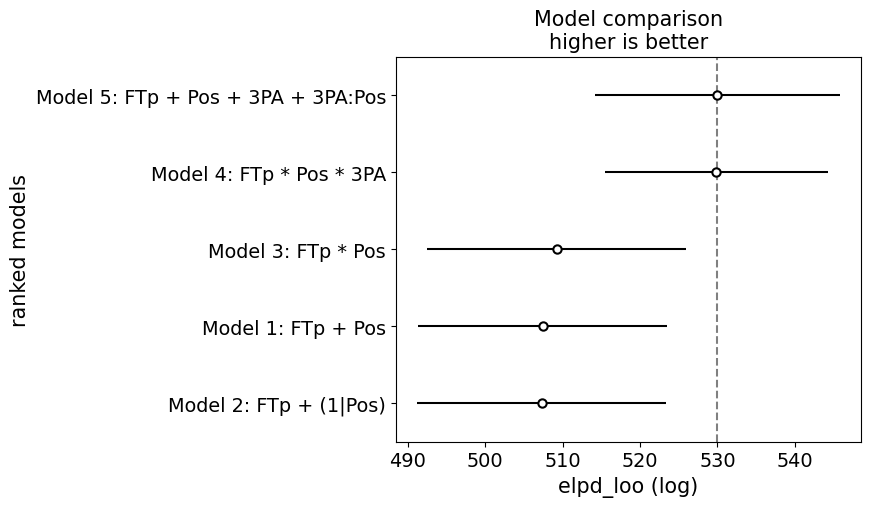

In [ ]:
models_dict = {
    "Model 1: FTp + Pos": idata_1,
    "Model 2: FTp + (1|Pos)": idata_2,
    "Model 3: FTp * Pos": idata_3,
    "Model 4: FTp * Pos * 3PA": idata_4,
    "Model 5: FTp + Pos + 3PA + 3PA:Pos": idata_5
}

comp_df = az.compare(models_dict)
print(comp_df)

az.plot_compare(comp_df, insample_dev=False)
plt.show()

**Task11**:

Which model is "better" according to this metric? model 5

Why do you think that is? it has the most predictors


**Task12:**

The body data set has a measure of body fat percentage (siri), as well as several other measurments of other parts of a person's body, plus their age.

Create a sensible causal diagram for this set of variables.

Based on your causal diagram, which variable should you try to predict? Why?

In [ ]:
body = pd.read_csv('https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/main/Data/body_fat.csv')

In [ ]:
body.head()

,siri,age,weight,height,abdomen,thigh,wrist
0,12.3,23,70.1,172,85.2,59.0,17.1
1,6.1,22,78.8,184,83.0,58.7,18.2
2,25.3,22,70.0,168,87.9,59.6,16.6
3,10.4,26,84.0,184,86.4,60.1,18.2
4,28.7,24,83.8,181,100.0,63.2,17.7


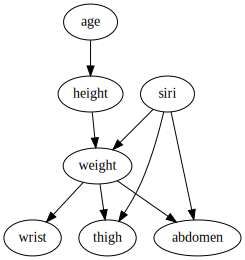

In [ ]:
dag_b = gv.Digraph(comment='body.head') #b for body

dag_b.node('H', 'height')
dag_b.node('W','weight')
dag_b.node('S','siri')
dag_b.node('A','age')
dag_b.node('B','abdomen')
dag_b.node('T','thigh')
dag_b.node('R','wrist')

dag_b.edges(['HW','SW','SB','ST','WB','WT','WR','AH'])

dag_b

I would probably predict thigh or abdomen as they are near the bottom of the diagram